# Probability & Statistics for EECS:

# Homework \#11




Due on April 30, 2023 at 23:59




Name: **Zhou Shouchen**

Student ID: 2021533042

Coding part(problem 5)

(a) sample the $N(0,1)$ with the method Box-Muller

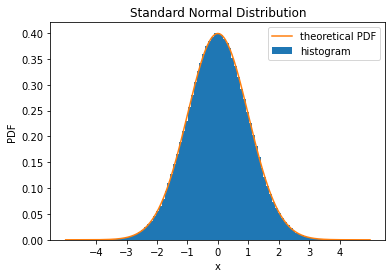

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Normal distribution
def normal_PDF(x, mu, sigma): # the PDF of the normal distribution
    return 1 / (np.sqrt(2 * np.pi) * sigma) * np.exp(-(x - mu)**2 / (2 * sigma**2))

# Exponential Distribution
def exponential_PDF(x): # the PDF of the exponential distribution
    return np.exp(-x)

def exponential_inverse(x): # the inverse of the exponential distribution
    return -np.log(1 - x)

def inverse_transform_sampling(sample_size): # inverse transform sampling
    u = np.random.uniform(0, 1, sample_size) # uniform random numbers
    return exponential_inverse(u)

sample_size = 1000000

expo = inverse_transform_sampling(sample_size) # sample points using inverse transform sampling
u = np.random.uniform(0, 2 * np.pi, sample_size) # uniform random numbers
X = np.sqrt(2 * expo) * np.cos(u) # sample points using Box-Muller method
Y = np.sqrt(2 * expo) * np.sin(u) # sample points using Box-Muller method

plt.hist(X, bins = 100, density = True)

# plot the pdf
x = np.linspace(-5, 5, 1000) # sample points for plotting pdf
pdf = normal_PDF(x, 0, 1) # pdf values at sample points
plt.plot(x, pdf)

plt.xlabel('x')
plt.ylabel('PDF')
plt.title('Standard Normal Distribution')
plt.legend(['theoretical PDF','histogram'])
plt.xticks(np.arange(-4, 5))
plt.show()

(b) Based on (a), generate the standard bivariate Normal distribution with correlation $\rho\in(-1,1)$.

In [7]:
def standard_bivariate(rho):
    Z = X
    W = rho * X + np.sqrt(1 - rho ** 2) * Y
    PDF = X * Y / np.sqrt(1 - rho ** 2)
    
    # plot the joint pdf of Z and W in 3d version
    # Z for x-axis, W for y-axis, PDF for z-axis
    
    # Z,W's joint PDF
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    hist, xedges, yedges = np.histogram2d(Z, W, bins = 100, density = True)
    xpos, ypos = np.meshgrid(xedges[:-1] + xedges[1:], yedges[:-1] + yedges[1:])
    xpos = xpos.flatten() / 2.
    ypos = ypos.flatten() / 2.
    zpos = np.zeros_like(xpos)
    dx = xedges[1] - xedges[0]
    dy = yedges[1] - yedges[0]
    dz = hist.flatten()
    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='blue', zsort='average')
    ax.set_xlabel('$Z$')
    ax.set_ylabel('$W$')
    ax.set_zlabel('$f_{Z,W}(z,w)$')
    ax.set_title('Joint PDF of Z and W, rho = ' + str(rho))
    plt.show()

    # sampled scatter plot
    plt.scatter(Z,W)
    plt.title('rho = ' + str(rho))
    plt.xlabel('Z')
    plt.ylabel('W')
    plt.show()
    
    # contour plot.
    plt.hist2d(Z, W, bins = 100, density = True)
    plt.xlabel('Z')
    plt.ylabel('W')
    plt.title('contour of joint PDF of Z and W, rho = ' + str(rho))
    plt.show()

(c) Take $\rho=0,0.3,0.5,0.7,0.9$.

And plot their corresponding plots.

From up to down, we take $\rho=0,0.3,0.5,0.7,0.9$.

And for every three images, it is the plots with the sam $rho$, they are the plot of $Z,W$'s joint PDF, sampled scatter plot, and their contour plot.

And the plots in the PDF version(submitted in the gradescope) have been rescaled into square to have a better version.

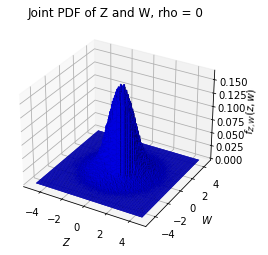

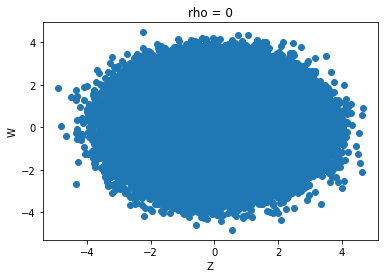

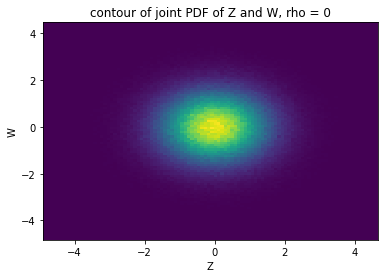

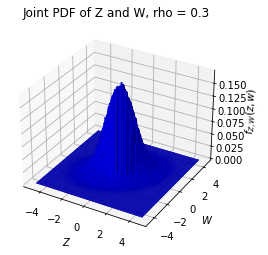

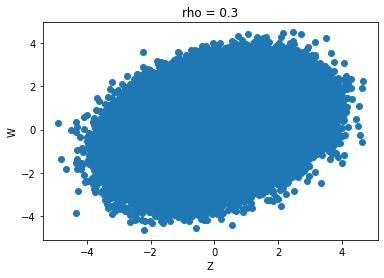

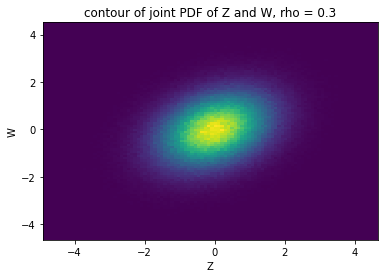

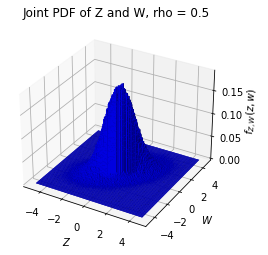

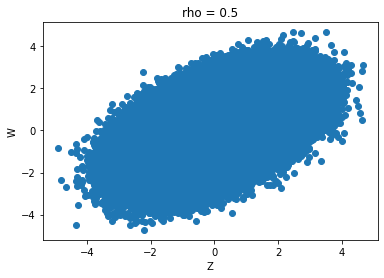

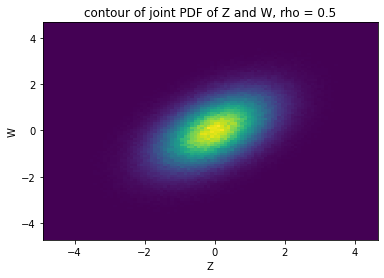

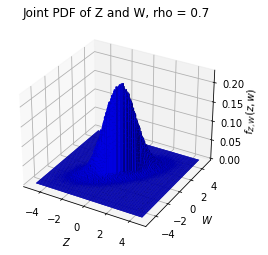

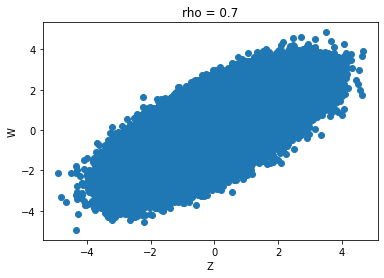

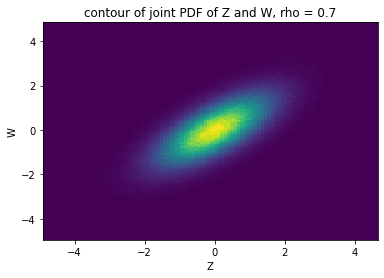

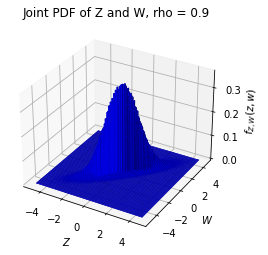

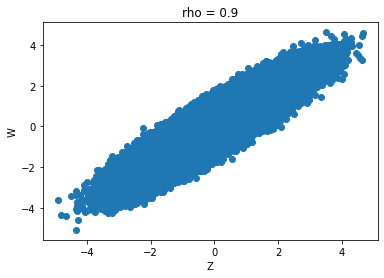

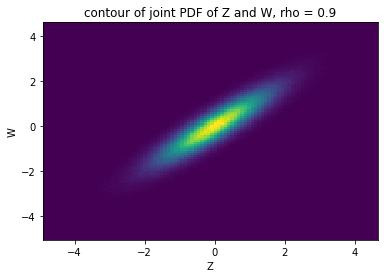

In [8]:
Rho = [0, 0.3, 0.5, 0.7, 0.9]
for rho in Rho:
    standard_bivariate(rho)